<a href="https://colab.research.google.com/github/vanessa-oreza/python/blob/1-machine-learning/ml_desafio_diabetes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Desafío

## Aula 1

Archivo: diabetes.csv

Vamos a practicar el contenido que se presentó en la clase a partir de algunas actividades, pero utilizando un conjunto de datos diferente con datos de pacientes a ser diagnosticados con diabetes o no.

1 - Para la construcción de un modelo de machine learning se necesitan datos. Como tarea inicial, realiza la lectura de la base de datos de diabetes y divide los datos en variables explicativas y variable objetivo (x e y). La variable objetivo es la columna que quieres clasificar, que contiene la información de si el paciente tiene o no diabetes. Las variables explicativas son todas las columnas excepto la de diabetes. La separación de los datos se puede hacer con la selección de columnas con pandas.

In [ ]:
import pandas as pd

In [ ]:
df=pd.read_csv('diabetes.csv')
df

,glicemia,presion_sanguinea,grasa_subcutanea_triceps,insulina,imc,diabetes
0,66,23,94,28.1,0.167,0
1,40,35,168,43.1,2.288,1
2,50,32,88,31.0,0.248,1
3,70,45,543,30.5,0.158,1
4,60,23,846,30.1,0.398,1
...,...,...,...,...,...,...
389,88,44,510,43.3,0.222,1
390,88,39,110,36.5,1.057,1
391,58,26,16,28.4,0.766,0
392,76,48,180,32.9,0.171,0


In [ ]:
X=df.drop(columns='diabetes')
X

,glicemia,presion_sanguinea,grasa_subcutanea_triceps,insulina,imc
0,66,23,94,28.1,0.167
1,40,35,168,43.1,2.288
2,50,32,88,31.0,0.248
3,70,45,543,30.5,0.158
4,60,23,846,30.1,0.398
...,...,...,...,...,...
389,88,44,510,43.3,0.222
390,88,39,110,36.5,1.057
391,58,26,16,28.4,0.766
392,76,48,180,32.9,0.171


In [ ]:
y=df.diabetes
y

,diabetes
0,0
1,1
2,1
3,1
4,1
...,...
389,1
390,1
391,0
392,0


2 - Una etapa muy importante en proyectos de clasificación es la validación de los modelos, para identificar si hay una generalización del modelo para datos nuevos. Realiza la división de los datos entre entrenamiento, validación y prueba. Utiliza el 5% de los datos para prueba y con el resto, deja el 25% para validación. En el momento de la separación, usa el parámetro stratify a partir de la variable objetivo para mantener la proporción de los datos.

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X, X_prueba, y, y_prueba = train_test_split(X, y, stratify = y, test_size = 0.05, random_state = 7)
X_entrenamiento, X_val, y_entrenamiento, y_val = train_test_split(X, y, stratify = y, random_state = 7)

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

Después de la importación de los algoritmos, podemos instanciar los modelos y almacenarlos en variables, aquí se eligieron los valores de max_depth = 3 para el DecisionTree y max_depth = 2 para el RandomForest:

In [ ]:
arbol = DecisionTreeClassifier(max_depth = 3)
random_forest = RandomForestClassifier(max_depth = 2)

In [ ]:
arbol.fit(X_entrenamiento, y_entrenamiento)
print(f'Precisión de entrenamiento: {arbol.score(X_entrenamiento, y_entrenamiento)}')
print(f'Precisión de prueba: {arbol.score(X_val, y_val)}')

Precisión de entrenamiento: 0.75
Precisión de prueba: 0.7127659574468085


In [ ]:
random_forest.fit(X_entrenamiento, y_entrenamiento)
print(f'Precisión de entrenamiento: {random_forest.score(X_entrenamiento, y_entrenamiento)}')
print(f'Precisión de prueba: {random_forest.score(X_val, y_val)}')

Precisión de entrenamiento: 0.725
Precisión de prueba: 0.6914893617021277


In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay

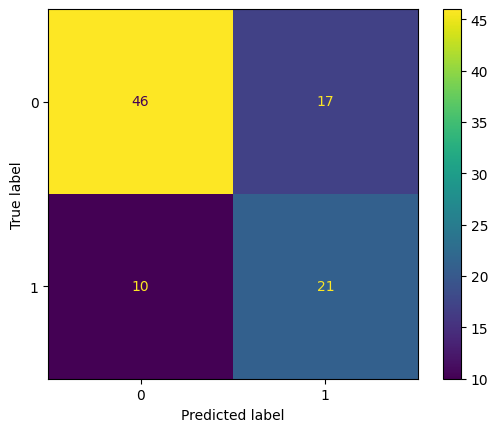

In [ ]:
prediccion_arbol = arbol.predict(X_val)
ConfusionMatrixDisplay.from_predictions(y_val, prediccion_arbol);

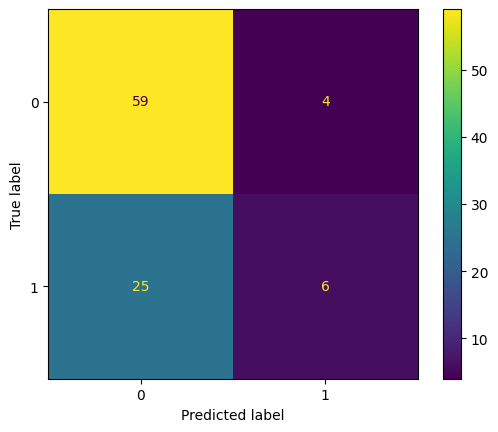

In [ ]:
prediccion_rf = random_forest.predict(X_val)
ConfusionMatrixDisplay.from_predictions(y_val, prediccion_rf);

## Aula 2

1 - Para una evaluación completa de un modelo de clasificación, podemos explorar métricas que evalúan la tasa de acierto general y también para cada clase de la variable objetivo de forma individual. Extrae las métricas de precisión, recall, precisión y F1-Score de los modelos de clasificación generados en el desafío de la clase 1. La biblioteca Scikit-Learn tiene funciones para calcular cada una de las métricas, solo necesitas importar y utilizar como parámetros los valores reales y previstos por el modelo.

Solución 1 - Para extraer las métricas de un modelo, primero importaremos las funciones que calculan automáticamente:

accuracy_score

recall_score

precision_score

f1_score


In [ ]:
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score

Ahora vamos a calcular cada una de las métricas para los dos modelos, utilizando los datos reales y los valores previstos:

In [ ]:
prevision_arbol = arbol.predict(X_val)

print(f'Precisión (Decision Tree): {accuracy_score(y_val, prevision_arbol)}')
print(f'Recall (Decision Tree): {recall_score(y_val, prevision_arbol)}')
print(f'Precisión (Decision Tree): {precision_score(y_val, prevision_arbol)}')
print(f'F1_Score (Decision Tree): {f1_score(y_val, prevision_arbol)}')

Precisión (Decision Tree): 0.7127659574468085
Recall (Decision Tree): 0.6774193548387096
Precisión (Decision Tree): 0.5526315789473685
F1_Score (Decision Tree): 0.6086956521739131


In [ ]:
prevision_rf = random_forest.predict(X_val)

print(f'Precisión (Random Forest): {accuracy_score(y_val, prevision_rf)}')
print(f'Recall (Random Forest): {recall_score(y_val, prevision_rf)}')
print(f'Precisión (Random Forest): {precision_score(y_val, prevision_rf)}')
print(f'F1_Score (Random Forest): {f1_score(y_val, prevision_rf)}')

Precisión (Random Forest): 0.6914893617021277
Recall (Random Forest): 0.1935483870967742
Precisión (Random Forest): 0.6
F1_Score (Random Forest): 0.2926829268292683



2 - Además de métricas numéricas, se pueden explorar gráficos para evaluar el rendimiento de un modelo y comprender si puede diferenciar bien una clase de otra. Obtén la curva ROC y la métrica AUC de los modelos de clasificación generados en el desafío de la clase 1, comparando las curvas en el mismo gráfico. La curva ROC se puede generar usando el método RocCurveDisplay.from_predictions.


Solución 2 - Para obtener el gráfico de la curva ROC y la métrica AUC, primero importaremos las funciones para generar el gráfico y calcular la métrica:

In [ ]:
from sklearn.metrics import RocCurveDisplay, roc_auc_score

Para presentar los resultados de la curva ROC en el mismo gráfico, podemos almacenar el gráfico en una variable y utilizar el parámetro ax para usar el gráfico ya existente como base:

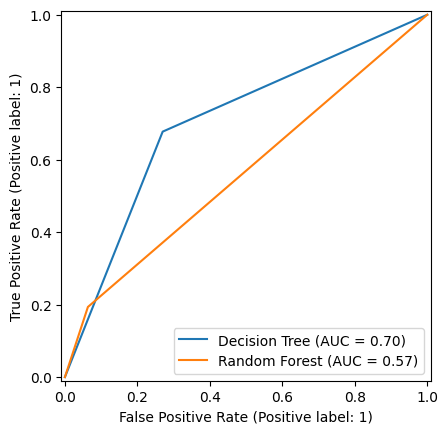

In [ ]:
curva_roc = RocCurveDisplay.from_predictions(y_val, prevision_arbol, name = 'Decision Tree')
curva_roc = RocCurveDisplay.from_predictions(y_val, prevision_rf, name = 'Random Forest', ax = curva_roc.ax_)

Ahora solo falta usar el método roc_auc_score para calcular el AUC de los dos modelos:

In [ ]:
print(f'AUC (Decision Tree): {roc_auc_score(y_val, prevision_arbol)}')
print(f'AUC (Random Forest): {roc_auc_score(y_val, prevision_rf)}')

AUC (Decision Tree): 0.70378904249872
AUC (Random Forest): 0.5650281618023554


3 - Además de la curva ROC, la curva de precisión x recall se puede usar para evaluar el rendimiento de modelos, siendo más interesante para datos desbalanceados. Obtén la curva de precisión x recall y la métrica AP de los modelos de clasificación generados en el desafío de la clase 1, comparando las curvas en el mismo gráfico. La curva de precisión x recall se puede generar usando el método PrecisionRecallDisplay.from_predictions.

Solución 3 - Para obtener el gráfico de la curva de precisión x recall y la métrica AP, primero importaremos las funciones para generar el gráfico y calcular la métrica:

In [ ]:
from sklearn.metrics import PrecisionRecallDisplay, average_precision_score

Para presentar los resultados de la curva de precisión x recall en el mismo gráfico, podemos almacenar el gráfico en una variable y utilizar el parámetro ax para usar el gráfico ya existente como base:

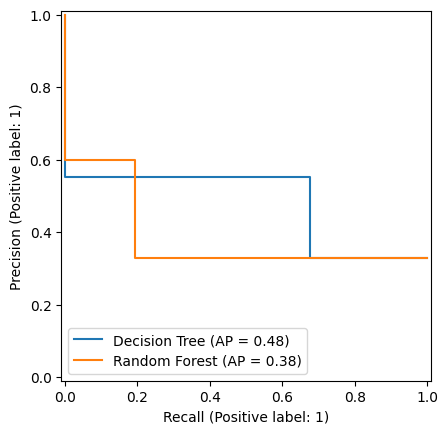

In [ ]:
curva_precision_recall = PrecisionRecallDisplay.from_predictions(y_val, prevision_arbol, name = 'Decision Tree')
curva_precision_recall = PrecisionRecallDisplay.from_predictions(y_val, prevision_rf, name = 'Random Forest', ax = curva_precision_recall.ax_)

Ahora solo falta usar el método average_precision_score para calcular el AP de los dos modelos:

In [ ]:
print(f'AP (Decision Tree): {average_precision_score(y_val, prevision_arbol)}')
print(f'AP (Random Forest): {average_precision_score(y_val, prevision_rf)}')

AP (Decision Tree): 0.48074630639742805
AP (Random Forest): 0.3820864790665751


4 - Un resumen de las principales métricas de clasificación puede ser muy útil para resumir la información y generar insights de forma rápida. Genera los informes de métricas de los modelos de clasificación construidos en el desafío de la clase 1. El informe de métricas se puede generar a partir de la función classification_report de la biblioteca Scikit-Learn.

Como consejo, revisa la documentación de Scikit-learn desde este enlace y verifica una forma de presentar los resultados de las curvas en el mismo gráfico usando matplotlib.

Solución 4 - Para generar el informe de métricas, primero necesitamos importar la función classification_report:

In [ ]:
from sklearn.metrics import classification_report

A partir de ahí, podemos generar los informes para cada uno de los modelos, utilizando los valores reales y previstos:

In [ ]:
print('Decision Tree')
print(classification_report(y_val, prevision_arbol))
print('Random Forest')
print(classification_report(y_val, prevision_rf))

Decision Tree
              precision    recall  f1-score   support

           0       0.82      0.73      0.77        63
           1       0.55      0.68      0.61        31

    accuracy                           0.71        94
   macro avg       0.69      0.70      0.69        94
weighted avg       0.73      0.71      0.72        94

Random Forest
              precision    recall  f1-score   support

           0       0.70      0.94      0.80        63
           1       0.60      0.19      0.29        31

    accuracy                           0.69        94
   macro avg       0.65      0.57      0.55        94
weighted avg       0.67      0.69      0.63        94



## Aula 3
**1 - En el proceso de validación cruzada, se generan diferentes modelos para cada división realizada en los datos y, en consecuencia, diferentes valores de métricas de evaluación. Para encontrar un resultado promedio de las métricas, se puede construir un intervalo de confianza a partir de la media y la desviación estándar de las métricas. Crea una función para calcular el intervalo de confianza de los resultados de una validación cruzada con 2 desviaciones estándar.**

**La función necesita 2 parámetros: uno para recibir una lista con los resultados de las métricas de la validación cruzada y otro para recibir el nombre del algoritmo. Para generar el intervalo de confianza, extrae la media de los resultados de la lista y la desviación estándar. El intervalo de confianza debe ser presentado en un print con el valor mínimo siendo la media restada de 2 desviaciones estándar y el valor máximo siendo la media sumada de 2 desviaciones estándar.**

**Ejemplo de retorno de la función:**

**`Intervalo de confianza ("nombre del modelo"): ["valor mínimo del intervalo", "valor máximo del intervalo"]`**

Solución 1 - Para calcular el intervalo de confianza de los resultados de la validación cruzada, necesitamos la lista de resultados y también el nombre del modelo para presentarlo en la función print. Vamos a crear una función llamada intervalo_conf que recibe dos parámetros:

*   resultados
*   nombre modelo



A partir de los resultados, podemos extraer la media y la desviación estándar y generar el intervalo de confianza que está a una distancia de dos desviaciones estándar por debajo y por encima de esa media:

In [ ]:
def intervalo_conf(resultados, nombre_modelo):
    scores = resultados['test_score']  # Extrae solo los scores, que es un array
    media = scores.mean()
    desvio_estandar = scores.std()
    print(f'Intervalo de confianza ({nombre_modelo}): [{media - 2*desvio_estandar:.4f}, {min(media + 2*desvio_estandar, 1):.4f}]')

**2 - KFold es la estrategia más simple de validación cruzada, que permite la división aleatoria de los datos en k partes, siendo utilizada una parte para validación y el resto para entrenamiento del modelo. El proceso de creación de modelos se repite hasta que todas las partes son utilizadas como validación. Sabiendo esto, evalúa el desempeño de los modelos con un intervalo de confianza utilizando la validación cruzada con el método KFold, usando 10 partes, con el uso del parámetro n_splits y mezclando los datos antes de la separación con el parámetro shuffle. Usa el método cross_val_score que no retorna el tiempo de ejecución, solo las métricas.**

Solución 2 - El primer paso a realizar es importar la función cross_val_score y el método KFold:

In [ ]:
from sklearn.model_selection import cross_val_score, KFold

Hecho esto, vamos a inicializar los modelos y utilizar el KFold con n_splits=10 para generar una división de 10 partes. Además, utilizaremos el parámetro shuffle=True para barajar los datos antes de realizar la separación.

Posteriormente, vamos a usar el método cross_val_score para realizar el procedimiento de validación cruzada con los dos modelos y generar el intervalo de confianza a partir de los resultados:

In [ ]:
arbol = DecisionTreeClassifier(max_depth = 3)
random_forest = RandomForestClassifier(max_depth = 2)

kf = KFold(n_splits = 10, shuffle = True, random_state = 5)

resultado_arbol = cross_val_score(arbol, X, y, cv = kf)
resultado_rf = cross_val_score(random_forest, X, y, cv = kf)

intervalo_conf(resultado_arbol, 'Decision Tree')
intervalo_conf(resultado_rf, 'Random Forest')

Intervalo de confianza (Decision Tree): [0.48588608564768887, 0.8200883098003905]
Intervalo de confianza (Random Forest): [0.5246102634890275, 0.8608804904227789]


**3 - En el proceso de división de datos con el KFold aleatorio, puede ser que la proporción de cada categoría de la variable objetivo no se mantenga en cada una de las partes de los datos. Para mantener esa proporción en cada una de las partes, podemos utilizar el KFold estratificado, haciendo que el proceso de validación de datos sea mucho más consistente. Evalúa el desempeño de los modelos con un intervalo de confianza utilizando la validación cruzada (cross_val_score) con el método StratifiedKFold, usando el parámetro n_splits y mezclando los datos antes de la separación con el parámetro shuffle y evaluando la métrica F1-Score usando el parámetro scoring.**

3 - El primer paso a realizar es importar la función cross_val_score y el método StratifiedKFold:

In [ ]:
from sklearn.model_selection import cross_val_score, StratifiedKFold

El paso sigue de forma muy parecida al desafío anterior, diferenciándose en la elección del método de validación que será estratificado, con el método StratifiedKFold. Además, la métrica de evaluación necesita ser alterada a f1, a partir del parámetro scoring de la función cross_val_score:

In [ ]:
arbol = DecisionTreeClassifier(max_depth = 3)
random_forest = RandomForestClassifier(max_depth = 2)

skf = StratifiedKFold(n_splits = 10, shuffle = True, random_state = 5)

resultado_arbol = cross_val_score(arbol, X, y, cv = skf, scoring = 'f1')
resultado_rf = cross_val_score(random_forest, X, y, cv = skf, scoring =  'f1')

intervalo_conf(resultado_arbol, 'Decision Tree')
intervalo_conf(resultado_rf, 'Random Forest')

Intervalo de confianza (Decision Tree): [0.11493945938366856, 0.8040885373425379]
Intervalo de confianza (Random Forest): [0.07583765330066461, 0.6440699284611371]


**4 - En conjuntos de datos con pocos registros (pocas filas), las estrategias de separación de los datos para validación pueden hacer que quede poca información en los datos de entrenamiento, haciendo que el modelo no comprenda bien el patrón de los datos. El LeaveOneOut es una estrategia para sortear este problema, utilizando solo un registro como dato de validación. Evalúa el desempeño de los modelos utilizando la validación cruzada (cross_val_score) con el método LeaveOneOut.**

**El método LeaveOneOut generará un modelo para cada una de las filas de la base de datos, por lo tanto, la lista de resultados tendrá tasa de acierto solo de 0 o 1 para cada modelo. De esta forma, extrae solo la media del resultado con el método mean(), sin utilizar el intervalo de confianza.**

Solución 4 - El primer paso a realizar es importar la función cross_val_score y el método LeaveOneOut:

In [ ]:
from sklearn.model_selection import cross_val_score, LeaveOneOut

La construcción del código se da de forma muy parecida a los desafíos anteriores. Primero, los modelos son inicializados y luego se inicializa el método LeaveOneOut, sin la necesidad de definir parámetros, ya que recorre toda la base de datos hasta que todos los valores han sido elegidos como datos de validación y el resto como datos de entrenamiento.

Aquí vamos a calcular solo la media de los resultados, por lo tanto, utilizaremos el método mean() en cada una de las listas de resultados para obtener la precisión media.

In [ ]:
arbol = DecisionTreeClassifier(max_depth = 3)
random_forest = RandomForestClassifier(max_depth = 2)

loo = LeaveOneOut()

resultado_arbol = cross_val_score(arbol, X, y, cv = loo)
resultado_rf = cross_val_score(random_forest, X, y, cv = loo)

print(f'Precisión media (Decision Tree): {resultado_arbol.mean()}')
print(f'Precisión media (Random Forest):{resultado_rf.mean()}')

Precisión media (Decision Tree): 0.5989304812834224
Precisión media (Random Forest):0.6871657754010695


##Aula 4
**Durante la clase, exploramos dos estrategias de balanceo de datos: oversampling y undersampling. En cada una de ellas utilizamos un algoritmo diferente, el SMOTE para generar nuevos datos sintéticos y el NearMiss para mantener datos que tienen un patrón cercano entre las clases.**

**Estos no son los únicos algoritmos existentes y el oversampling y undersampling no necesitan ser utilizados de manera aislada. Es posible combinar las dos estrategias en una sola para equilibrar los puntos negativos de cada una de ellas. Esto no quiere decir que esta estrategia sea más efectiva en todas las ocasiones, pero es una opción que puede ser explorada en los proyectos.**

**Como desafío, utiliza el algoritmo SMOTEENN, que combina el oversampling con SMOTE y el undersampling con el ENN (Edited Nearest Neighbours), para balancear los datos y observa los resultados obtenidos por el modelo usando el pipeline y la validación cruzada.**

**Como un consejo, revisa la documentación del método SMOTEENN a partir de este enlace para identificar cómo importar el método y cómo utilizarlo.**

Como primer paso, vamos a importar el método SMOTEENN desde la sección combine de la biblioteca imblearn:

In [ ]:
from imblearn.combine import SMOTEENN

Los pasos para utilizar el método con la validación cruzada son los mismos. Debemos instanciar el modelo y crear un pipeline con los pasos de balanceo de los datos y ajuste del modelo:

In [ ]:
from imblearn.pipeline import Pipeline as imbpipeline

In [ ]:
modelo = DecisionTreeClassifier(max_depth = 10)
pipeline = imbpipeline([('smoteenn', SMOTEENN()), ('arbol', modelo)])

Después de eso, podemos utilizar la validación cruzada con el StratifiedKFold para mantener la proporción en los datos y utilizar el método cross_validate con el pipeline, evaluando el rendimiento con la métrica recall y generando el intervalo de confianza de esa métrica:

In [ ]:
from sklearn.model_selection import cross_validate

In [ ]:
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=5)
cv_resultados = cross_validate(pipeline, X, y, cv=skf, scoring='recall')
intervalo_conf(cv_resultados, 'Decision Tree')


Intervalo de confianza (Decision Tree): [0.5140, 0.9146]


El resultado que se debería haber obtenido después del código es el siguiente:

Intervalo de confianza: [0.3273161671423985, 0.4010364843126096]

El recall de este modelo estuvo alrededor de 0.32 a 0.40, un poco mejor que el resultado usando solamente el oversampling, pero peor que el resultado del undersampling. Por lo tanto, esta estrategia no fue tan eficiente para este caso, pero eso no significa que no pueda ser utilizada en otros proyectos.


No me funcionó, pero bueno, ya lo averiguaremos.